In [5]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'annual_aqi_by_county_2024.csv'
data = pd.read_csv(file_path)
data.head()

relevant_columns = ['Days Ozone', 'Days PM2.5', 'Max AQI']
statistics = data[relevant_columns].describe().T

statistics['median'] = data[relevant_columns].median()
statistics = statistics[['mean', 'median', 'std']]

statistics


,mean,median,std
Days Ozone,61.089077,50.0,56.856923
Days PM2.5,57.063627,56.0,49.787470
Max AQI,87.407211,78.0,65.949038


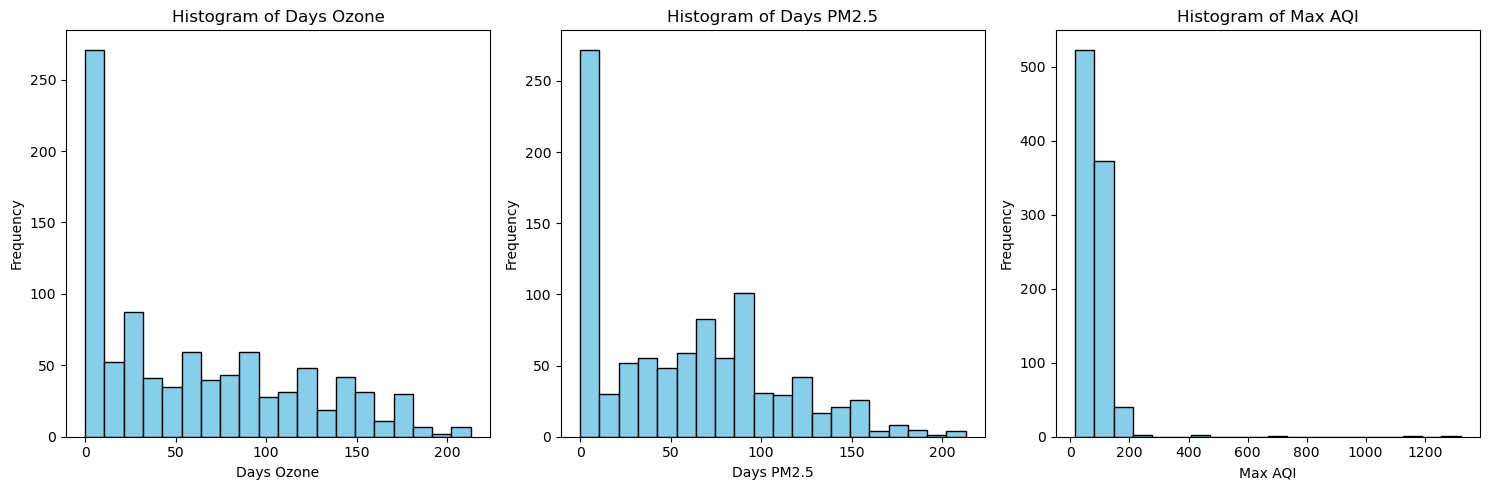

In [9]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(relevant_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

file_path = 'annual_aqi_by_county_2024.csv'  
data = pd.read_csv(file_path)

days_ozone = data['Days Ozone']
days_pm25 = data['Days PM2.5']
max_aqi = data['Max AQI']

pearson_corr_ozone, p_value_ozone = pearsonr(days_ozone, max_aqi)
pearson_corr_pm25, p_value_pm25 = pearsonr(days_pm25, max_aqi)

spearman_corr_ozone, sp_value_ozone = spearmanr(days_ozone, max_aqi)
spearman_corr_pm25, sp_value_pm25 = spearmanr(days_pm25, max_aqi)

print("Pearson Correlation:")
print(f"Days Ozone vs Max AQI: {pearson_corr_ozone:.2f} (p-value: {p_value_ozone:.3f})")
print(f"Days PM2.5 vs Max AQI: {pearson_corr_pm25:.2f} (p-value: {p_value_pm25:.3f})\n")

print("Spearman Correlation:")
print(f"Days Ozone vs Max AQI: {spearman_corr_ozone:.2f} (p-value: {sp_value_ozone:.3f})")
print(f"Days PM2.5 vs Max AQI: {spearman_corr_pm25:.2f} (p-value: {sp_value_pm25:.3f})")


Pearson Correlation:
Days Ozone vs Max AQI: 0.11 (p-value: 0.001)
Days PM2.5 vs Max AQI: 0.10 (p-value: 0.003)

Spearman Correlation:
Days Ozone vs Max AQI: 0.33 (p-value: 0.000)
Days PM2.5 vs Max AQI: 0.23 (p-value: 0.000)


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'annual_aqi_by_county_2024.csv' 
data = pd.read_csv(file_path)

days_ozone = data['Days Ozone'].values.reshape(-1, 1)
days_pm25 = data['Days PM2.5'].values.reshape(-1, 1)
max_aqi = data['Max AQI'].values

model_ozone = LinearRegression()
model_ozone.fit(days_ozone, max_aqi)

predictions_ozone = model_ozone.predict(days_ozone)
r2_ozone = r2_score(max_aqi, predictions_ozone)
mse_ozone = mean_squared_error(max_aqi, predictions_ozone)

model_pm25 = LinearRegression()
model_pm25.fit(days_pm25, max_aqi)

predictions_pm25 = model_pm25.predict(days_pm25)
r2_pm25 = r2_score(max_aqi, predictions_pm25)
mse_pm25 = mean_squared_error(max_aqi, predictions_pm25)

print("Linear Regression Results:")
print("\nDays Ozone vs Max AQI")
print(f"Intercept: {model_ozone.intercept_:.2f}")
print(f"Coefficient: {model_ozone.coef_[0]:.2f}")
print(f"R-squared: {r2_ozone:.2f}")
print(f"Mean Squared Error: {mse_ozone:.2f}")

print("\nDays PM2.5 vs Max AQI")
print(f"Intercept: {model_pm25.intercept_:.2f}")
print(f"Coefficient: {model_pm25.coef_[0]:.2f}")
print(f"R-squared: {r2_pm25:.2f}")
print(f"Mean Squared Error: {mse_pm25:.2f}")


Linear Regression Results:

Days Ozone vs Max AQI
Intercept: 79.93
Coefficient: 0.12
R-squared: 0.01
Mean Squared Error: 4296.27

Days PM2.5 vs Max AQI
Intercept: 80.05
Coefficient: 0.13
R-squared: 0.01
Mean Squared Error: 4303.52


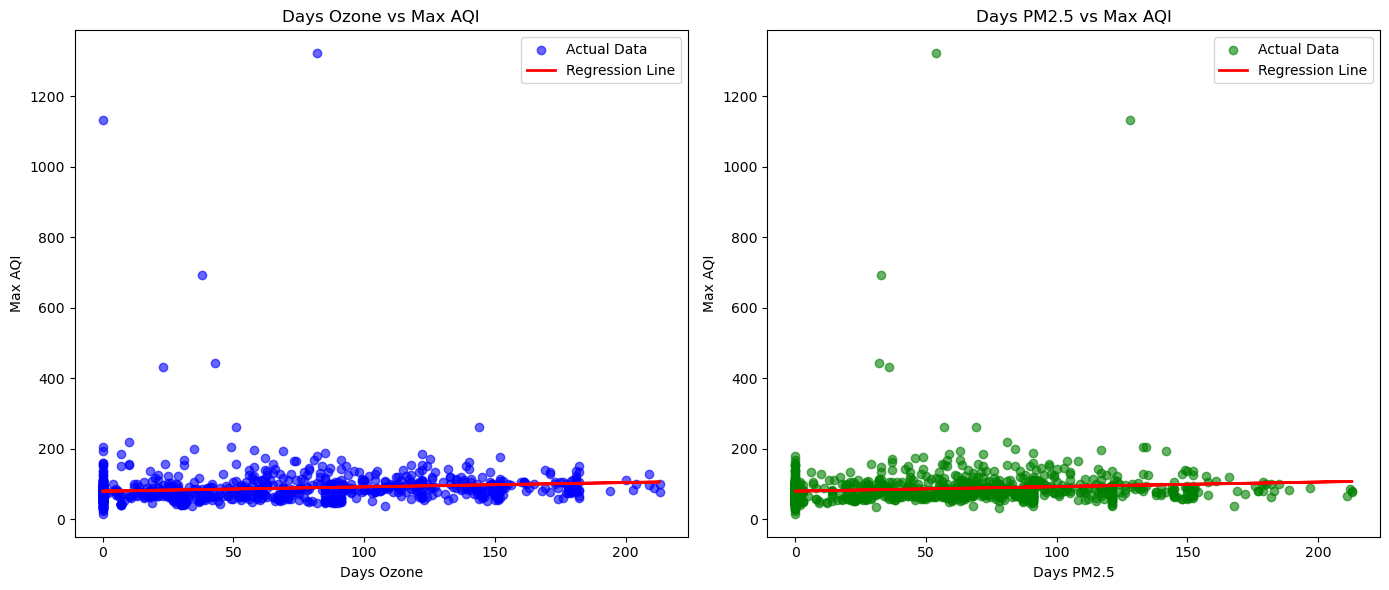

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = 'annual_aqi_by_county_2024.csv'  
data = pd.read_csv(file_path)

days_ozone = data['Days Ozone'].values.reshape(-1, 1)
days_pm25 = data['Days PM2.5'].values.reshape(-1, 1)
max_aqi = data['Max AQI'].values

model_ozone = LinearRegression()
model_ozone.fit(days_ozone, max_aqi)
ozone_pred_line = model_ozone.predict(days_ozone)

model_pm25 = LinearRegression()
model_pm25.fit(days_pm25, max_aqi)
pm25_pred_line = model_pm25.predict(days_pm25)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(days_ozone, max_aqi, color='blue', alpha=0.6, label='Actual Data')
plt.plot(days_ozone, ozone_pred_line, color='red', linewidth=2, label='Regression Line')
plt.title('Days Ozone vs Max AQI')
plt.xlabel('Days Ozone')
plt.ylabel('Max AQI')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(days_pm25, max_aqi, color='green', alpha=0.6, label='Actual Data')
plt.plot(days_pm25, pm25_pred_line, color='red', linewidth=2, label='Regression Line')
plt.title('Days PM2.5 vs Max AQI')
plt.xlabel('Days PM2.5')
plt.ylabel('Max AQI')
plt.legend()

plt.tight_layout()
plt.show()


Explained Variance Ratio for each Principal Component:
PC1: 0.27
PC2: 0.16
PC3: 0.12
PC4: 0.11
PC5: 0.07
PC6: 0.06
PC7: 0.06
PC8: 0.06
PC9: 0.04
PC10: 0.02
PC11: 0.01
PC12: 0.01
PC13: 0.01
PC14: 0.00
PC15: 0.00
PC16: 0.00


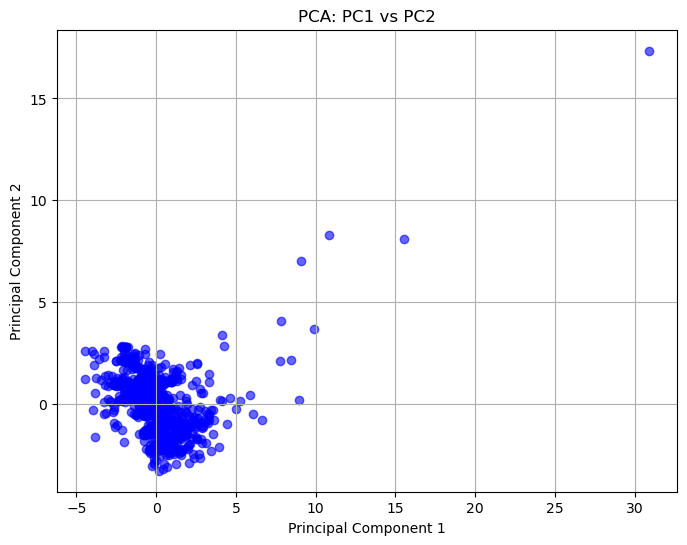

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'annual_aqi_by_county_2024.csv'
data = pd.read_csv(file_path)

quantitative_data = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_data)

pca = PCA()
pca_components = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_

pca_df = pd.DataFrame(pca_components, columns=[f"PC{i+1}" for i in range(pca_components.shape[1])])

print("Explained Variance Ratio for each Principal Component:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var_ratio:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, color='blue')
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


PCA Weights (Loadings):
      Year  Days with AQI  Good Days  Moderate Days  \
PC1   -0.0       0.236387   0.045925       0.368293   
PC2   -0.0      -0.526302  -0.543615      -0.175897   
PC3    0.0       0.138209   0.331193      -0.293648   
PC4   -0.0       0.191077   0.114319       0.199911   
PC5    0.0      -0.015948   0.027256      -0.079218   
PC6    0.0       0.022672   0.040402      -0.009436   
PC7   -0.0      -0.046143  -0.055318       0.002681   
PC8    0.0       0.017840   0.165618      -0.221224   
PC9   -0.0       0.001482  -0.103752       0.230740   
PC10   0.0       0.026357   0.067262      -0.034605   
PC11  -0.0       0.038335  -0.304910       0.587366   
PC12   0.0       0.045496   0.035104       0.013181   
PC13  -0.0      -0.044814   0.132532      -0.323454   
PC14  -0.0      -0.713679   0.242781       0.144016   
PC15   0.0      -0.304495   0.600627       0.356288   
PC16   1.0       0.000000   0.000000       0.000000   

      Unhealthy for Sensitive Groups Day

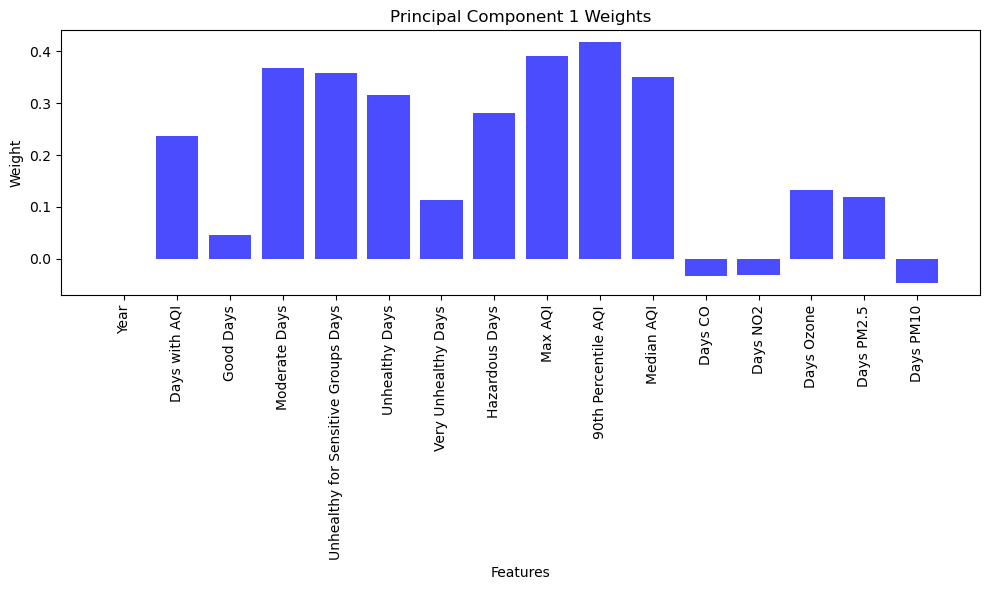

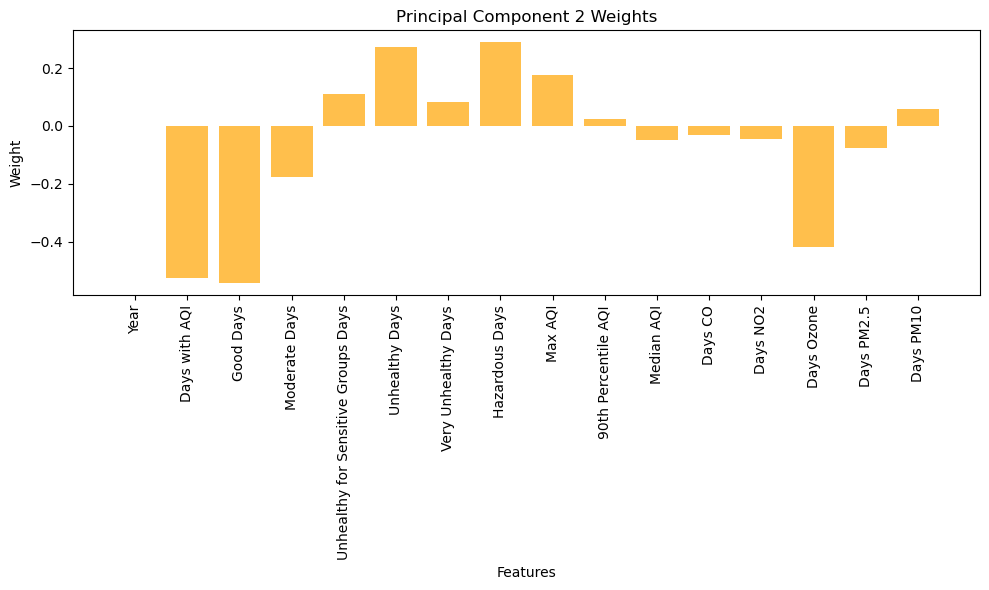

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'annual_aqi_by_county_2024.csv' 
data = pd.read_csv(file_path)


quantitative_data = data.select_dtypes(include=['float64', 'int64'])
feature_names = quantitative_data.columns  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_data)
pca = PCA()
pca.fit(scaled_data)

pca_weights = pca.components_ 
pca_weights_df = pd.DataFrame(
    pca_weights,
    columns=feature_names,
    index=[f"PC{i+1}" for i in range(pca_weights.shape[0])]
)

print("PCA Weights (Loadings):")
print(pca_weights_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, pca_weights[0], color='blue', alpha=0.7)
plt.title('Principal Component 1 Weights')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(feature_names, pca_weights[1], color='orange', alpha=0.7)
plt.title('Principal Component 2 Weights')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


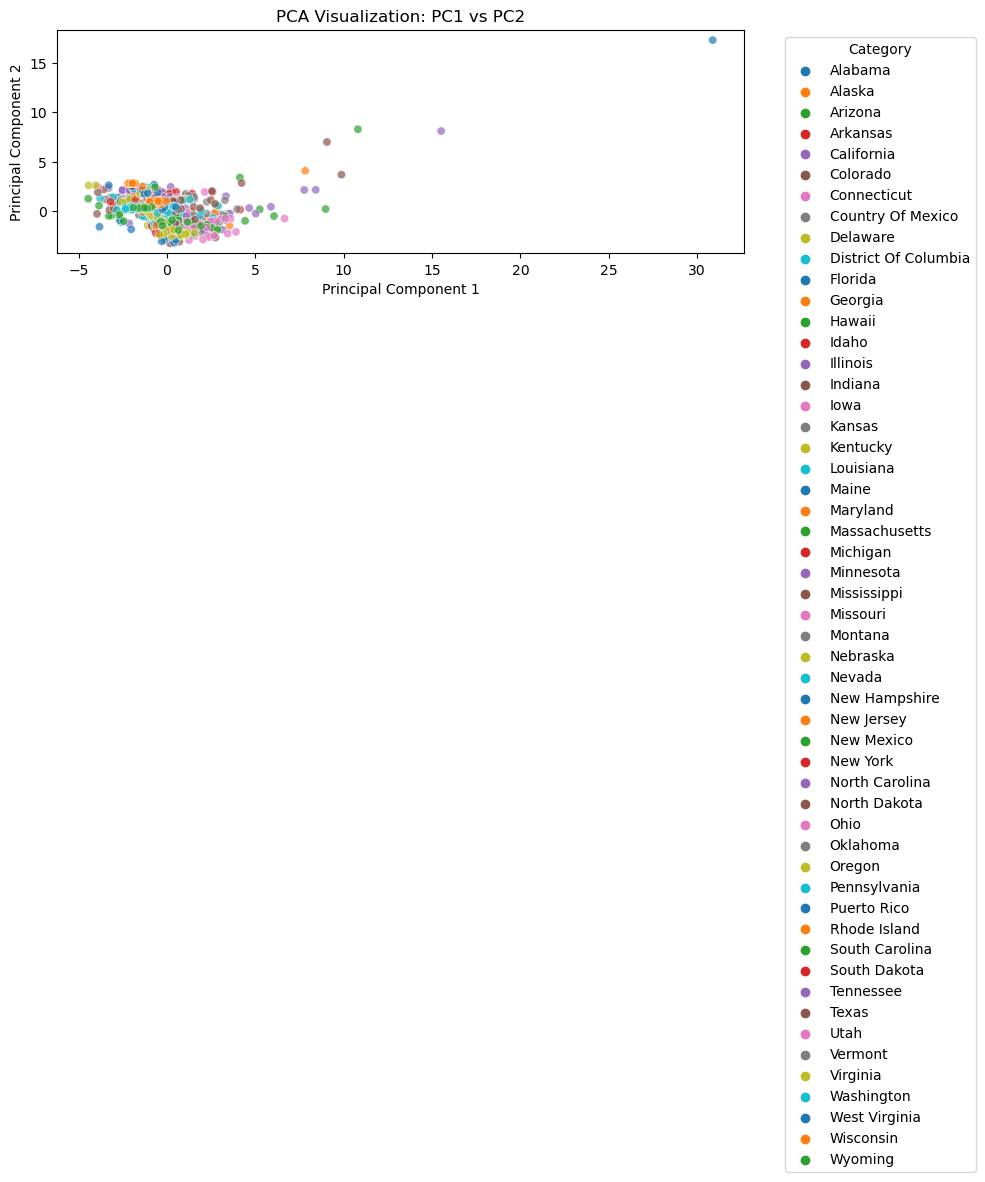

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'annual_aqi_by_county_2024.csv' 
data = pd.read_csv(file_path)


quantitative_data = data.select_dtypes(include=['float64', 'int64'])


categories = data['State'] 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_data)

pca = PCA(n_components=2) 
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Category'] = categories

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Category', 
    data=pca_df, 
    palette='tab10', 
    alpha=0.7
)

plt.title('PCA Visualization: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
